# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 10</span>

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

### Exercise 10.1
Starting from your Genetic Algorithm code implement a **Parallel Tempering algorithm** (Simulated Annealing with many temperatures). Parallelize with MPI libraries your algorithm in order to solve the TSP where each computing node, up to 10, is characterized by a different temperature or a limited set of temperatures (if you need more than 10 temperatures). Use your genetic operators (except crossover) as trial moves for the Metropolis algorithm and **add a trial move that proposes an exchange of paths among adjacent temperatures (nodes)** (see lecture 8 for the acceptance formula). The candidate solution of the TSP will appear on the node with the lower temperature.

### Exercise 10.2

Apply your parallel code to the TSP problem for 50 american state-capitals longitude and latitude coordinates in the *American_capitals.dat* file. By using a number of temperatures equal to the number of individuals in your **non-parallel Genetic Algorithm code**, do you "improve" with respect to it?

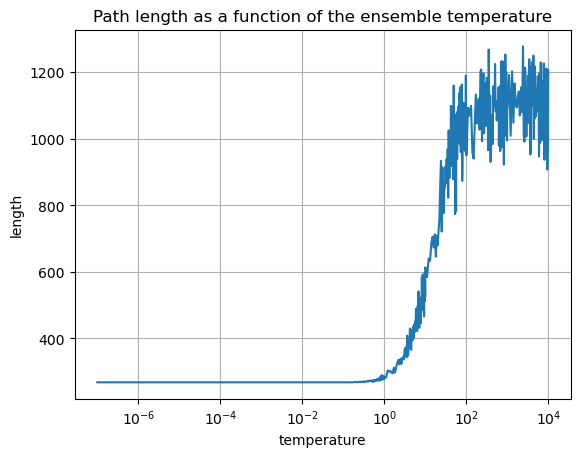

In [2]:
data_lengths_ang = np.loadtxt('lengths_angular_PT.out')
temperatures_ang = data_lengths_ang[:, 0]
lengths_ang = data_lengths_ang[:, 1]

plt.plot(temperatures_ang, lengths_ang)
plt.xlabel('temperature')
plt.ylabel('length')
plt.xscale("log")
plt.title('Path length as a function of the ensemble temperature')
plt.grid(True)
plt.show()

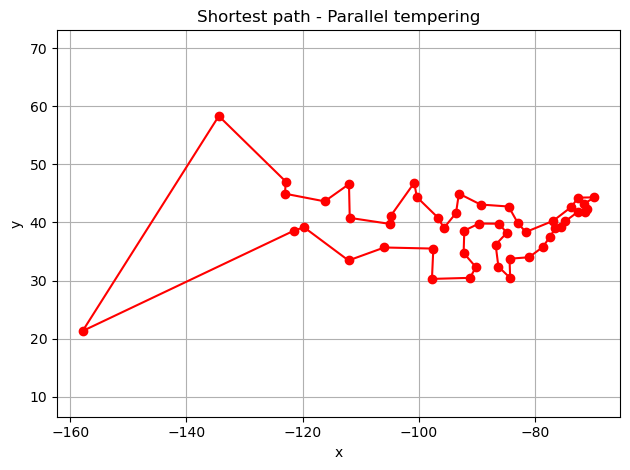

PARALLEL TEMPERING: length of the shortest path =  268.4


In [3]:
data_path_ang = np.loadtxt('best_path_angular_PT.out')
x_ang = data_path_ang[:, 0]
y_ang = data_path_ang[:, 1]

plt.plot(x_ang, y_ang, marker='o', linestyle='-', color='r')
plt.plot([x_ang[-1], x_ang[0]], [y_ang[-1], y_ang[0]], color='r', linestyle='-')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.title('Shortest path - Parallel tempering')
plt.grid(True)
plt.tight_layout()
plt.show()

print('PARALLEL TEMPERING: length of the shortest path = ', 268.4)

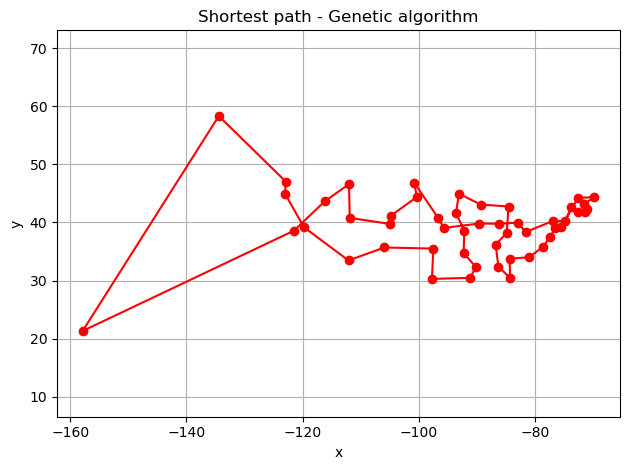

GENETIC ALGORITHM: length of the shortest path =  282.3


In [4]:
data_path_ang = np.loadtxt('best_path_angular_GA.out')
x_ang = data_path_ang[:, 0]
y_ang = data_path_ang[:, 1]

plt.plot(x_ang, y_ang, marker='o', linestyle='-', color='r')
plt.plot([x_ang[-1], x_ang[0]], [y_ang[-1], y_ang[0]], color='r', linestyle='-')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.title('Shortest path - Genetic algorithm')
plt.grid(True)
plt.tight_layout()
plt.show()

print('GENETIC ALGORITHM: length of the shortest path = ', 282.3)

### Comments

- The shortest path was found regarding longitude and latitude as coordinates in the cartesian plane. Strictly speaking this is not correct, since the longitude should at least pick up a factor $\sin(\lambda)$ ($\lambda$ is the latitude while $\phi$ is the longitude). However, this choice leads to a satisfactory plot, the positions of the capitals in the plane resemblig the actual ones on the planisphere. A more correct treatment is discussed below; its implementation can be found commented out in the code.

- The genetic algorithm (GA) run over 1000 generations of 1000 individuals, whereas the parallel tempering algorithm (PT) sampled Boltzmann distributions at 990 different temperatures (9 nodes with 110 temperatures each) with 10000 steps. The runtime of the two is similar (slightly shorter for GA) and under 30 seconds. As the plots above show, PT yielded a shorter path and notably one that do not intersect itself.

#### A more accurate calculation of path lenghts
The longitude and the latitude of the capitals are given as an input of the simulation. The distances between cities can be calculated using Pythagoras' theorem in flat space, which is a fairly good approximation, since we can assume that the paths we are considering (especially for the lower temperatures of PT) do not include connections between cities far apart. To do so, the coordinates $x$ and $y$ of the plot can be defined as: $$x = \phi \times \frac{\pi}{180^{\circ}}\times R_T \times \sin\left(\left(90^{\circ} - \lambda\right)\times \frac{\pi}{180^{\circ}}\right),$$ $$y = \lambda \times \frac{\pi}{180^{\circ}} \times R_T,$$ where $R_T$ is the radius of the Earth.
